<span  style="color:green">
    
# The Lifecycle In A Data Science Project
      
</span>

  1. *Data Collection* and Business Understanding
  2. Exploratory Data Analysis (EDA)
  3. Feature Engineering
  4. Model Building
  5. Model Deployment

# Section 1: Data Collection & Business Understanding

**Business Goal :** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Analysis:**

   * **Type of problem:** Supervised Learning problem
   * **Target feature :** Item_Outlet_Sales

**About Dataset**

<span  style="color:black">
    
Sales Prediction for Big Mart Outlets

   The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

   Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

   Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Data Dictionary
   We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

Train file:
CSV containing the item outlet information with a sales value

Variable Description:
- Item_Identifier ---- Unique product ID
- Item_Weight ---- Weight of product
- Item_Fat_Content ---- Whether the product is low fat or not
- Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
- Item_Type ---- The category to which the product belongs
- Item_MRP ---- Maximum Retail Price (list price) of the product
- Outlet_Identifier ---- Unique store ID
- Outlet_Establishment_Year ---- The year in which the store was established
- Outlet_Size ---- The size of the store in terms of ground area covered
- Outlet_Location_Type ---- The type of city in which the store is located
- Outlet_Type ---- Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.
    
</span>

The Hypotheses

<span  style="color:black">
    
    
I came up with the following hypothesis while thinking about the problem. These are just my thoughts and you can come-up with many more of these. Since we’re talking about stores and products, lets make different sets for each.

Store Level Hypotheses:

**City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

**Population Density:** Stores located in densely populated areas should have higher sales because of more demand.

**Store Capacity:** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

**Competitors:** Stores having similar establishments nearby should have less sales because of more competition.

**Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

**Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.

**Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales.

**Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

Product Level Hypotheses:

**Brand:** Branded products should have higher sales because of higher trust in the customer.

**Packaging:** Products with good packaging can attract customers and sell more.

**Utility:** Daily use products should have a higher tendency to sell as compared to the specific use products.

**Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.

**Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

**Advertising:** Better advertising of products in the store will should higher sales in most cases.

**Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.

These are just some basic 15 hypothesis I have made, but you can think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these gives us a better understanding of the problem and we can even look for open source information if available.

Lets move on to the data exploration where we will have a look at the data in detail.
    
    
 </span>

In [1]:
# For Data preparation and manipulation
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score

# For Scaling and Transforming the data
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split, cross_val_score

# For Creating model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBRegressor
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
Bigmart = pd.read_csv('E:/Data_Science/Projects/3- Big Mart Sales/Data Set/Train.csv')

In [3]:
Bigmart.shape

(8523, 12)

In [4]:
Bigmart

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [5]:
Bigmart.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [6]:
Bigmart.shape

(8523, 12)

In [7]:
HTML('<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/02/0.-data-dictionary-1.png" width="3000">')

In [8]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Features Description:**

* **Numerical features:**
    - **Item_Weight       :** Weight of the product or item.
    - **Item_Visibility   :** The % of the total display area of all products in a store allocated to the particular product.
    - **Item_MRP          :** Maximum Retail Price (list price) of the product
    - **Outlet_Establishment_Year :** The year in which the store was established.
    - **Item_Outlet_Sales :** sales of the product in a particular store. This is the target variable to be predicted.
    

* **Categorical features:**
    - **Item_Identifier :** Unique product ID (we would want to drop this column later) 
    - **Item_Fat_Content :** Whether the product is low, fat or not
    - **Item_Type         :** The category to which the product belongs.
    - **Outlet_Identifier :** Unique store ID
    - **Outlet_Size    :** The size of the store in terms of ground area covered.
    - **Outlet_Location_Type :** The type of city in which the store is located.
    - **Outlet_Type :** Whether the outlet is just a grocery store or some sort of supermarket.

In [9]:
Bigmart.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [10]:
Bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Section 2: Exploratory Data Analysis(EDA)

In Data Analysis We will Analyze To Find out the below stuff: We will not delete or modify any feature. We just investigate our data to understand below topics.We will start off by ploting and exploring all the individual variables to gain some insights.

1.  Missing Values
2.  All The Numerical Variables
3.  Distribution of the Numerical Variables
4.  Categorical Variables
5.  Cardinality of Categorical Variables
6.  Outliers
7.  Relationship between independent and dependent feature(Target).

#### Section2_1: Missing Values

In [11]:
feature_with_nan= [feature for feature in Bigmart.columns if Bigmart[feature].isnull().sum()>1]
print(Bigmart[feature_with_nan].isnull().sum())

Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [12]:
print(100*Bigmart.isnull().sum()/len(Bigmart), '%')

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 %


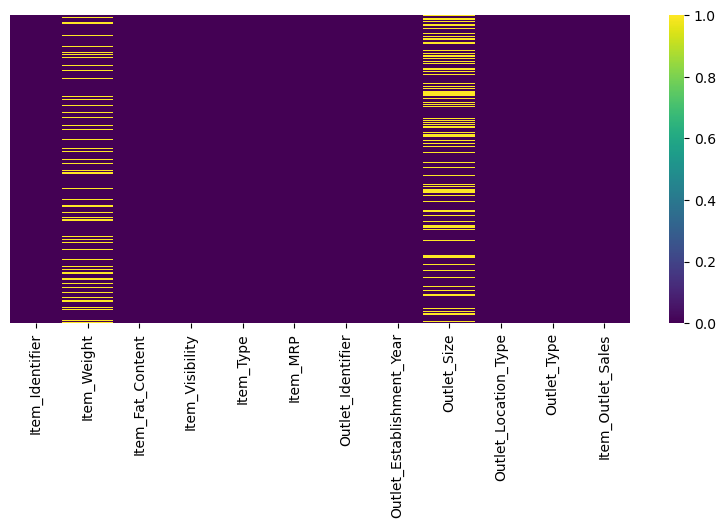

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(Bigmart.isnull(), yticklabels=False, cmap="viridis")
plt.show()

The yellow marks show presence of null values. We have quite a few null values in these two columns that will need to be sorted out. We shall look into that a little later.

#### Section 2-2: Numerical Variables

In [14]:
num_col = Bigmart.select_dtypes(include= ['number'])
num_col

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  
0             3735.1380  
1              443.4228  
2             2097.2700  
3              732.3800  
4              994.7052  
...                 ...  
8518          2778.3834  
8519           549.2850  
8520          1193.1136  
8521          1845.5976  
8522           765.6700  

[8523 rows x 5 columns]

In [15]:
# Finding Discrete Variable
discrete_feature = [feature for feature in num_col if len(Bigmart[feature].unique())<15]
discrete_feature

['Outlet_Establishment_Year']

In [16]:
Bigmart['Outlet_Establishment_Year'].sort_values().unique()

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype=int64)

In [17]:
# Finding Continuous Variable
continuous_feature = [feature for feature in num_col if feature not in discrete_feature]
continuous_feature

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

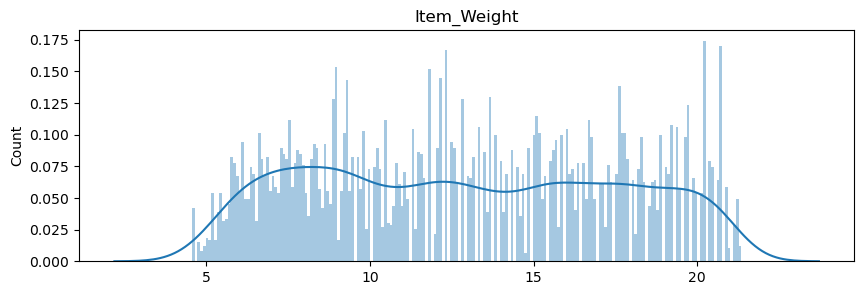

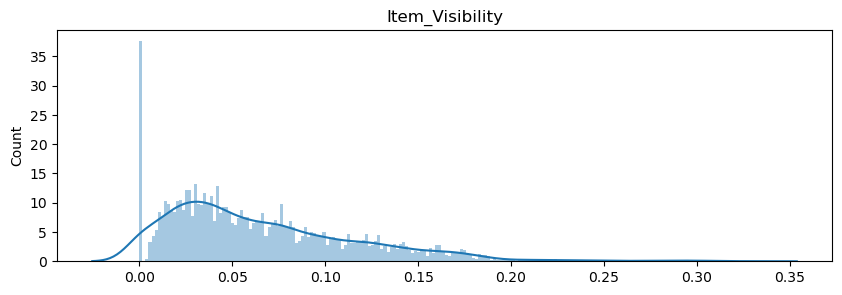

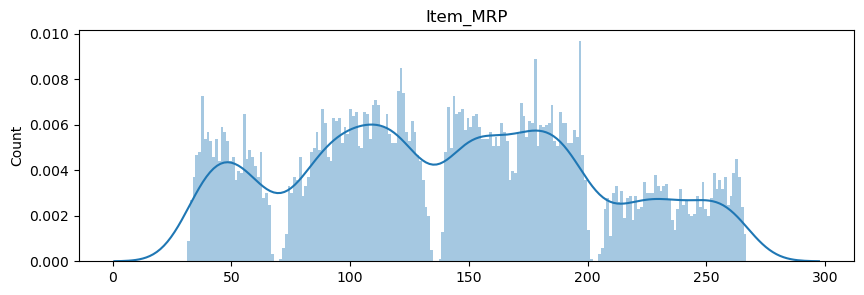

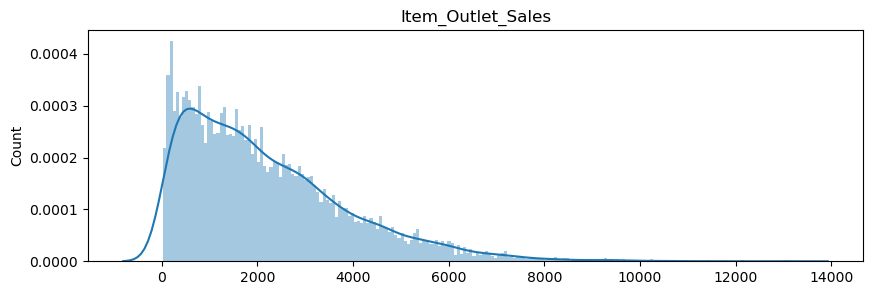

In [18]:
for feature in continuous_feature:
    data = Bigmart.copy()
    plt.figure(figsize=(10, 3))
    sns.distplot(x=data[feature], bins=200)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

**Observations:**
- We observe that the item weight range from 5 Kg to 20 Kg.
- Item_Visibility feature is right skewed.
- There are more products in the range of 100 MRP - 180 MRP in the Item_MRP feature
- We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1990 and 1995.
- Item_Outlet_Sales feature is right skewed. We can may be try to do a transformation in order to obtain a normal ou Gaussian distribution

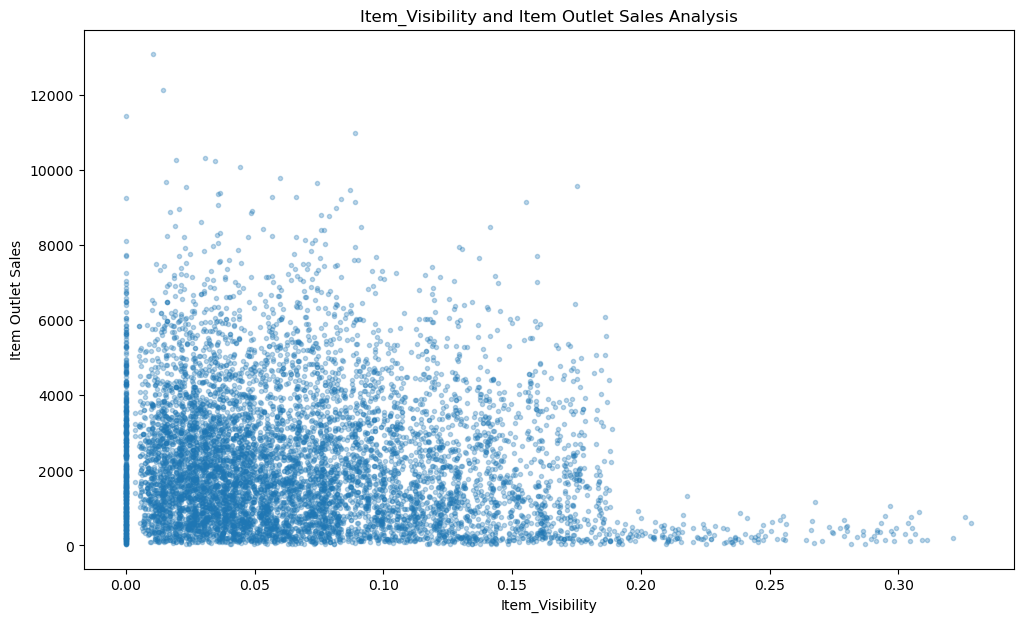

In [19]:
plt.figure( figsize=( 12, 7) )
plt.plot( Bigmart['Item_Visibility'], Bigmart['Item_Outlet_Sales'], '.', alpha=0.3 )
plt.xlabel( 'Item_Visibility' )
plt.ylabel( 'Item Outlet Sales' )
plt.title( 'Item_Visibility and Item Outlet Sales Analysis');

#### Section 2-3: Categorical Variables

Now we’ll try to explore and gain some insights from the categorical variables. A categorical variable or feature can
have only a finite set of values.

In [20]:
cat_feature = Bigmart.select_dtypes(exclude=['number'])
cat_feature

Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium               Tier 3  Supermarket Type2  
2               OUT049      Medium               Tier 1  Supermarket Type1  
3               OUT010         NaN               Tier 3      Grocery Store  
4               OUT013        High               Tier 3  Supermarket Type1  
...                ...         ...                  ...                ...  
8518            OUT013        High               Tier 3  Supermarket Type1  
8519            OUT045         NaN               Tier 2  Supermarket Type1  
8520            OUT035       Small               Tier 2  Supermarket Type1  
8521            OUT018      Medium               Tier 3  Supermarket Type2  
8522            OUT046       Small               Tier 1  Supermarket Type1  

[8523 rows x 7 columns]

In [21]:
for feature in cat_feature:
    print('The feature is: --{}-- and number of categories are:\n {}'.format(feature, Bigmart[feature].unique()))
    print('--'*50)

The feature is: --Item_Identifier-- and number of categories are:
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
----------------------------------------------------------------------------------------------------
The feature is: --Item_Fat_Content-- and number of categories are:
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------------------------------------------------------------------
The feature is: --Item_Type-- and number of categories are:
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------------------------------------------------------------------
The feature is: --Outlet_Identifier-- and number of categories are:
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
----------------------------

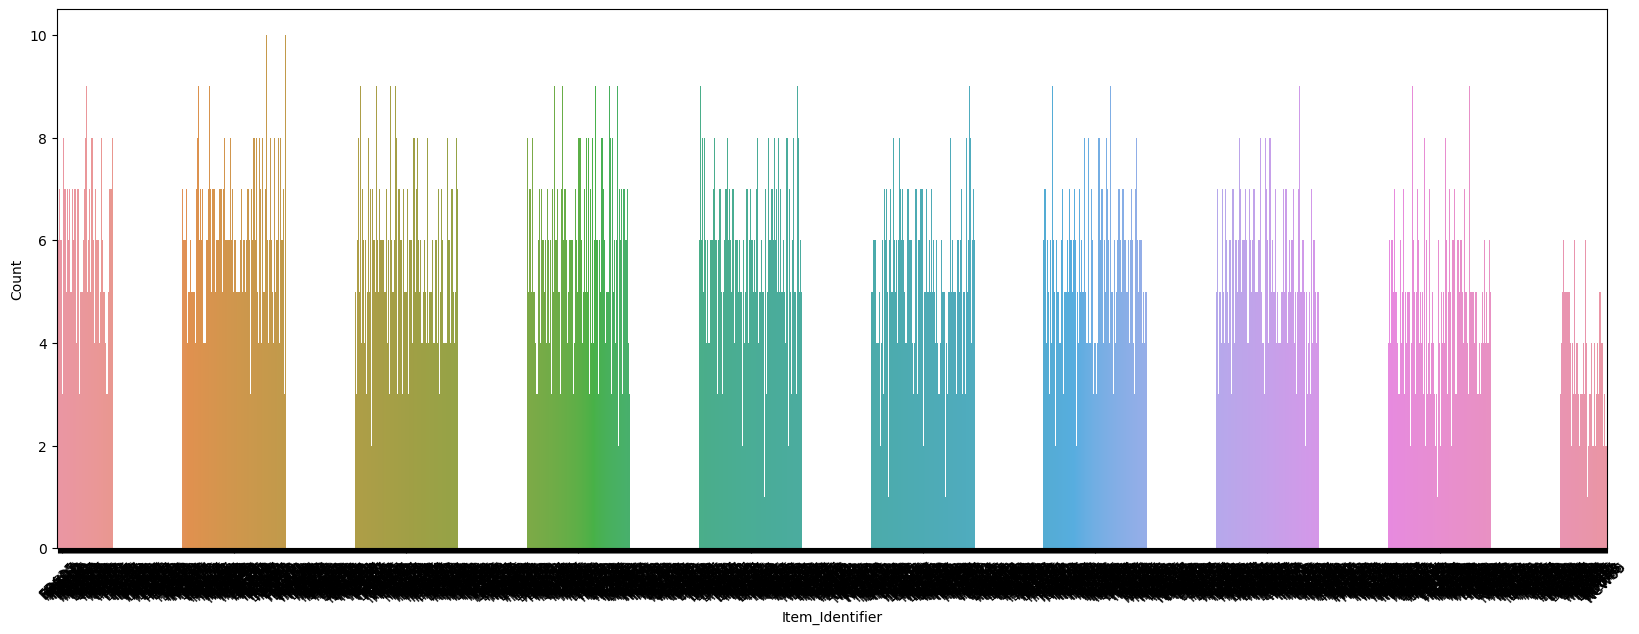

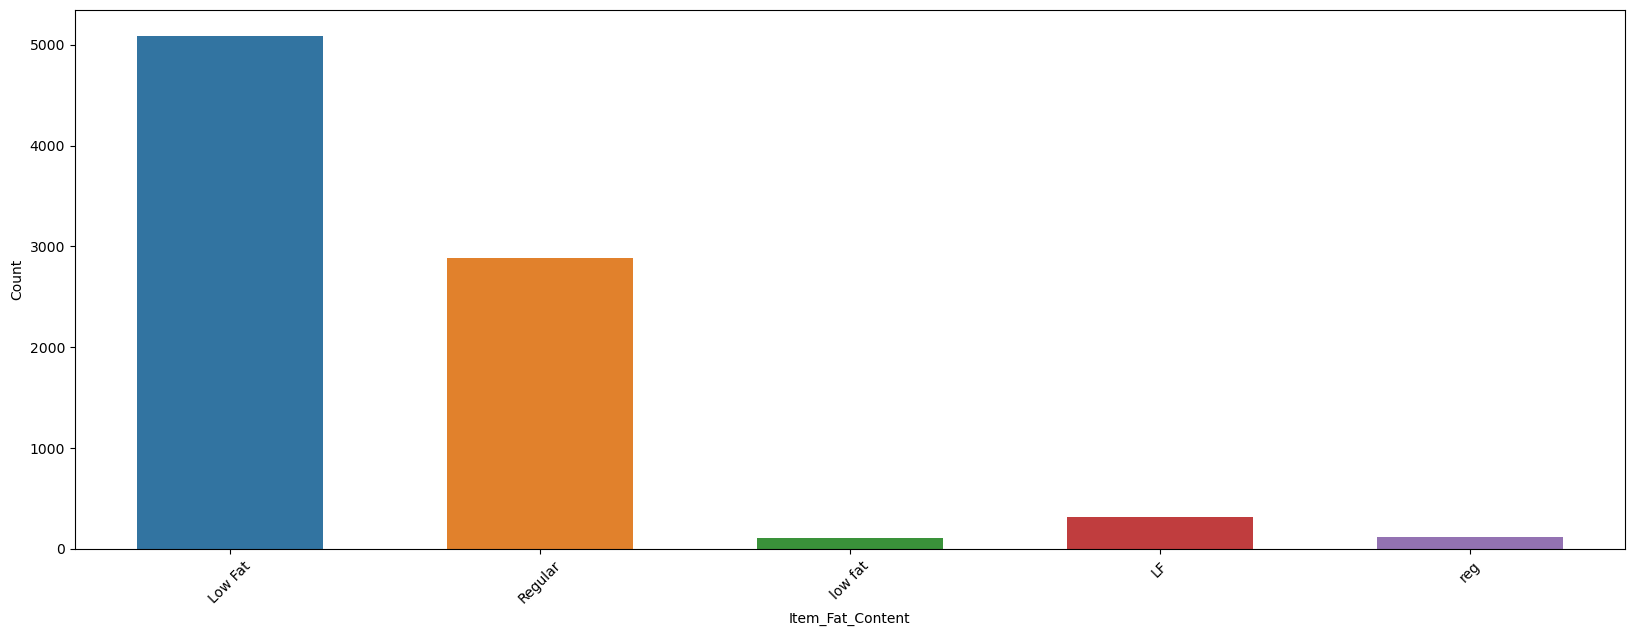

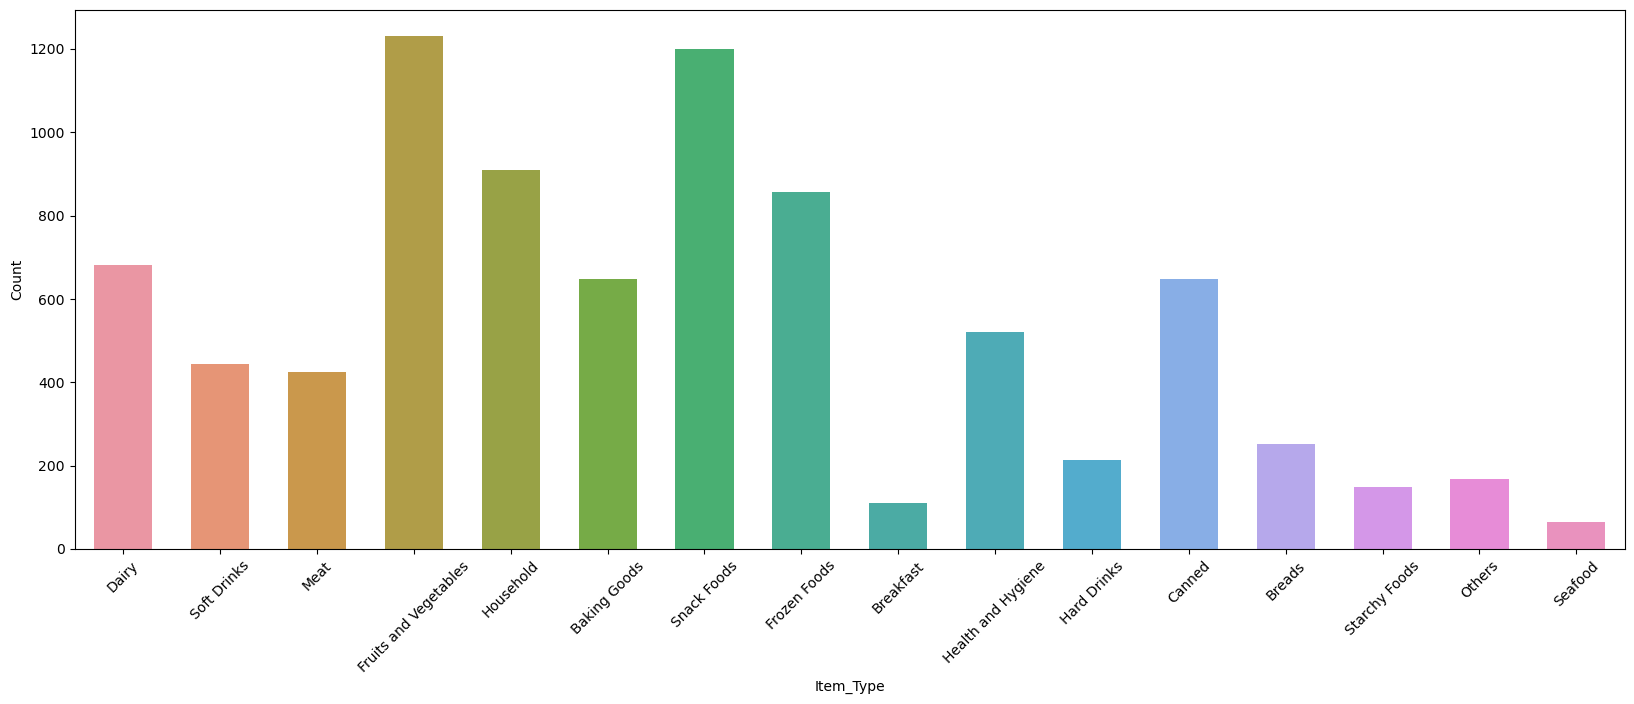

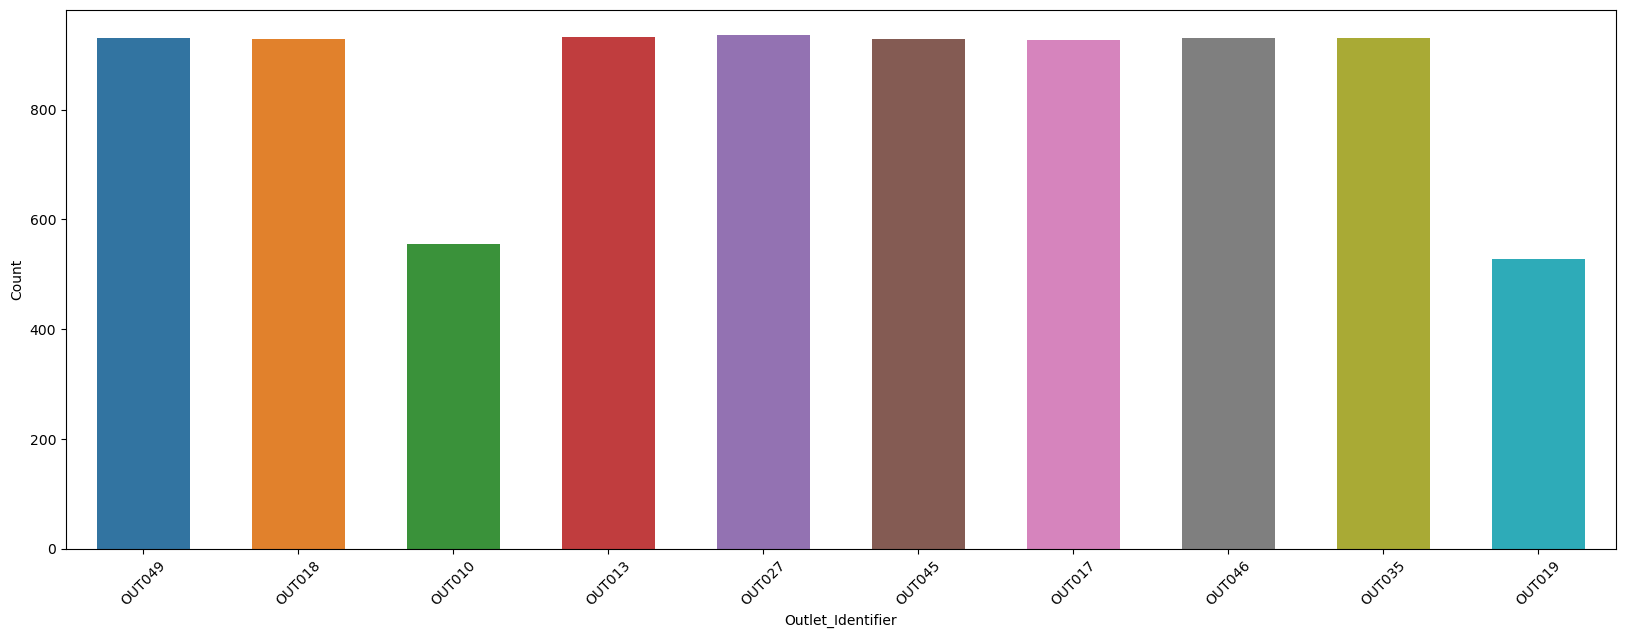

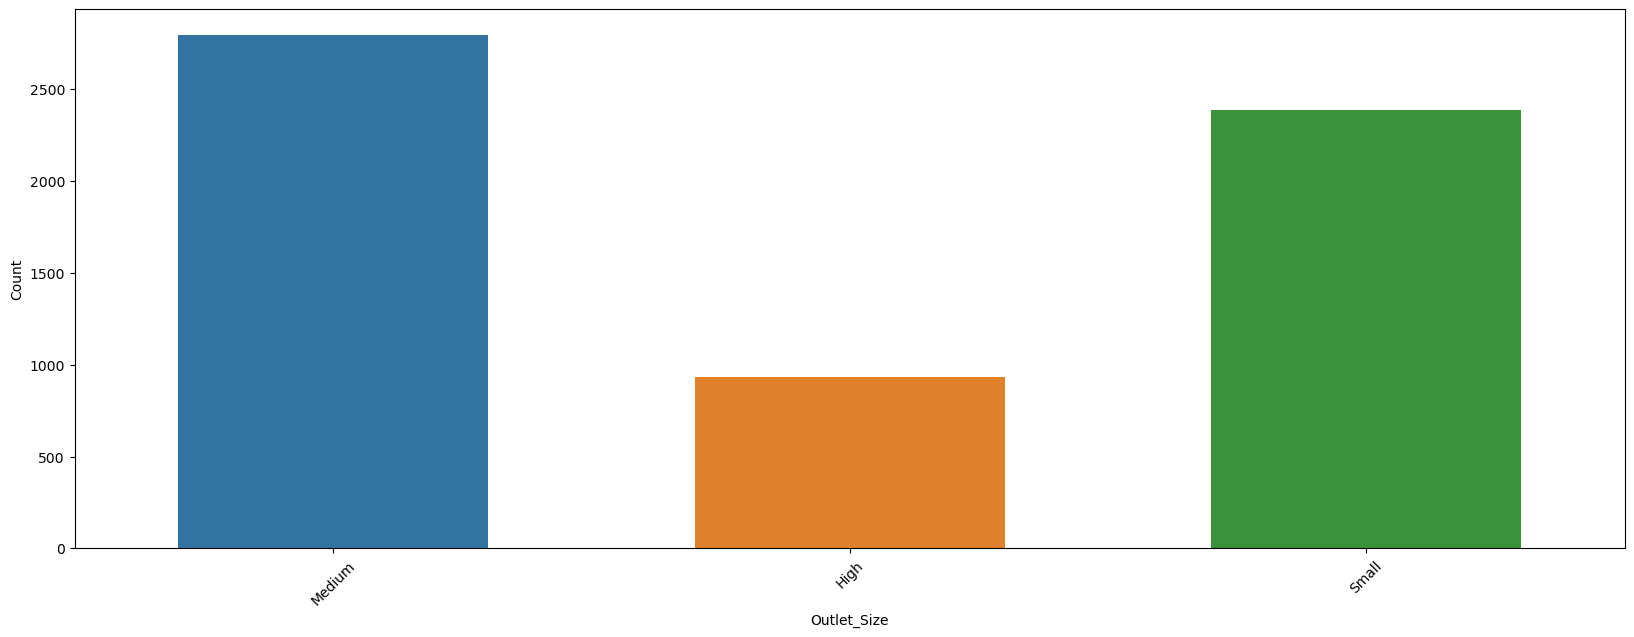

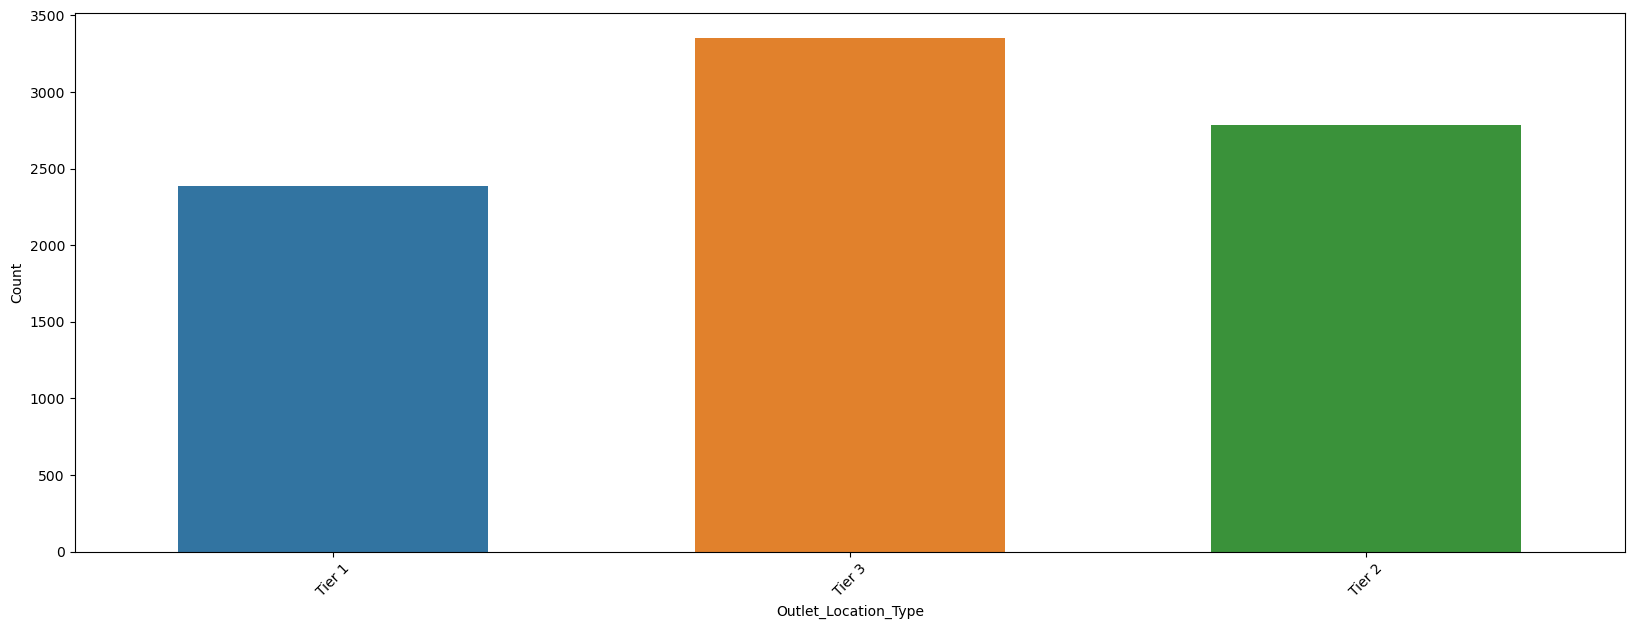

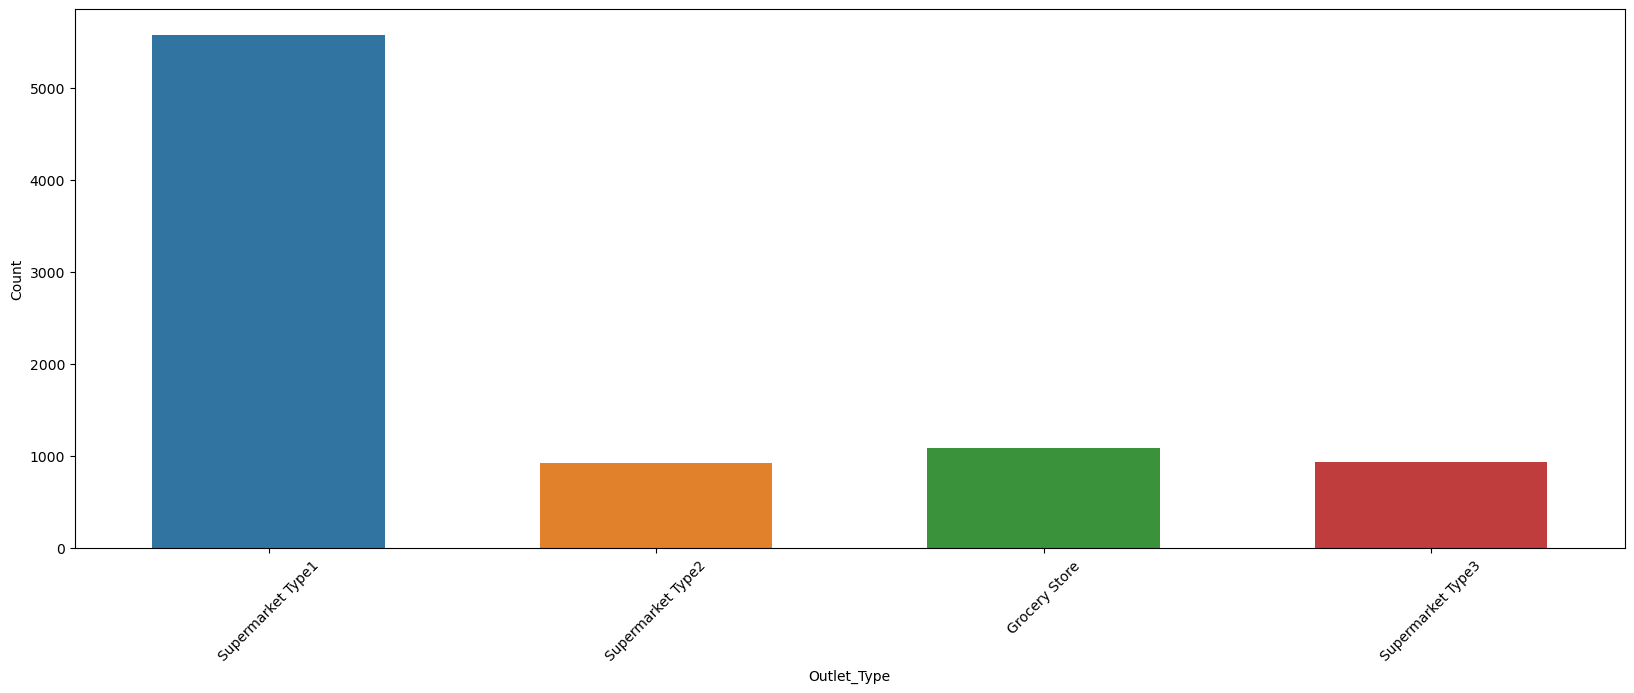

In [22]:
for feature in cat_feature:
    data= Bigmart.copy()
    plt.figure(figsize=(20, 7))
    sns.countplot(x=data[feature], data= data, width= 0.6)
    plt.xticks(rotation= 45)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#### Section 2_4: Relationship between independent and dependent feature(Target).

<Axes: >

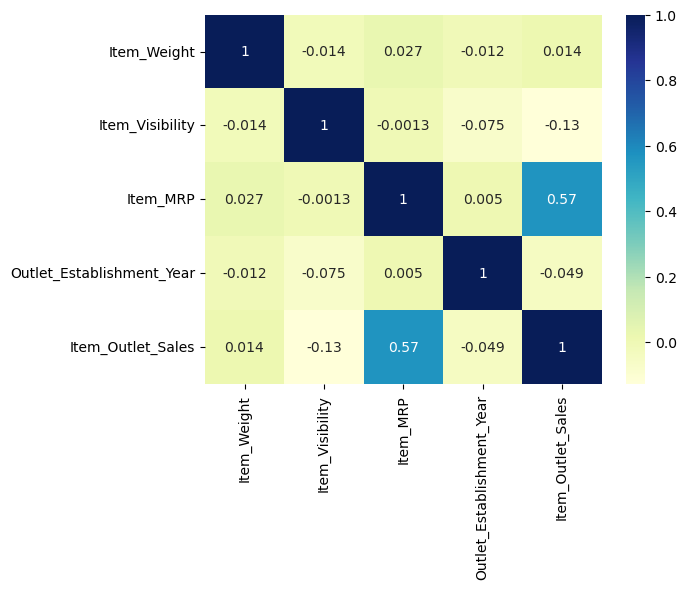

In [23]:
sns.heatmap(Bigmart.corr(), annot=True, cmap="YlGnBu")

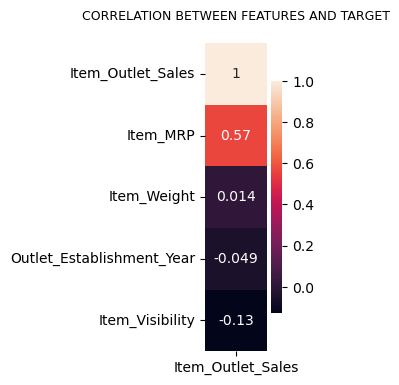

In [24]:
plt.figure(figsize=(1, 4))
sns.heatmap(Bigmart.corr()[['Item_Outlet_Sales']].sort_values( by='Item_Outlet_Sales',ascending=False), annot=True)
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=9);
plt.show()

**Item MRP and Item outlet sales shows high positive correlation which tells that as the MRP of the item increases the sales of that item also increases.**

**Similarly we can also notice that the item visibility and item outlet sales are negatively correlated which means that if the item is less visible then the sale of the item is more or if the item is more visible then the sale of the item is less..**

In [25]:
Bigmart.corr()['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [26]:
print ("Skewness :", Bigmart['Item_Outlet_Sales'].skew())
print("Kurtosis : ", Bigmart['Item_Outlet_Sales'].kurt())

Skewness : 1.1775306028542796
Kurtosis :  1.6158766814287264


# Section 3: Feature Engineering

## Section 3-1: Handling Numerical Vlaues

#### 3-1-1: Item_weight:

Item_weight is a numeric column and after visualizations, we can see clearly that there are no outliers in this feature. So we can replace missing values with its **mean**.

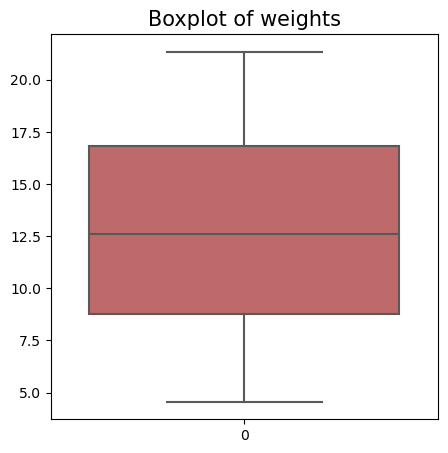

In [27]:
fig1=plt.figure(figsize=(5,5))
sns.boxplot(Bigmart['Item_Weight'],orient='v',color='indianred')
plt.title('Boxplot of weights',size=15);

In [28]:
Bigmart['Item_Weight'].fillna(Bigmart['Item_Weight'].mean(), inplace=True)

In [29]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 3-1-2: Item_Visibility:

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

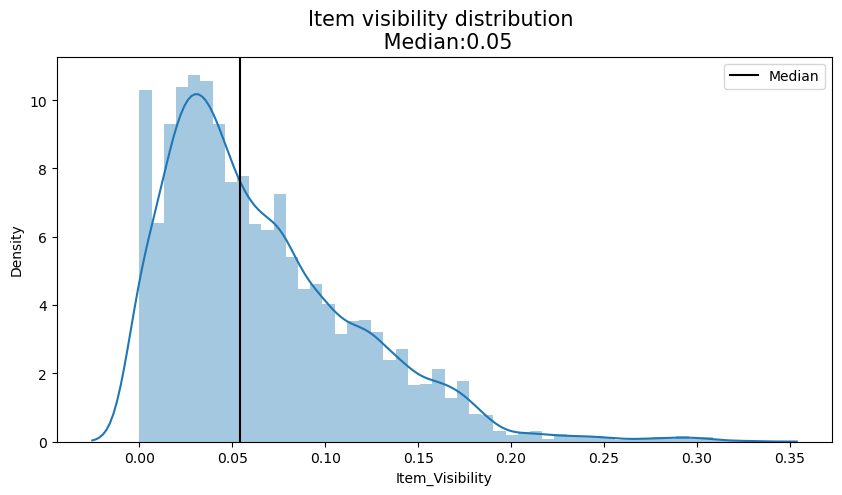

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(Bigmart['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(Bigmart['Item_Visibility'].median()),size=15)
plt.axvline(Bigmart['Item_Visibility'].median(),color='black',label='Median')
plt.legend();

As we see from the curve, the item visibility has a right skew. Hence, a median would give us better indication than a mean value. Let us check for outliers if any.

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.32111501, 0.32578081,
         0.32839095])),
 (0.04934877527401508, 0.06613202877895107, 0.9560728731678179))

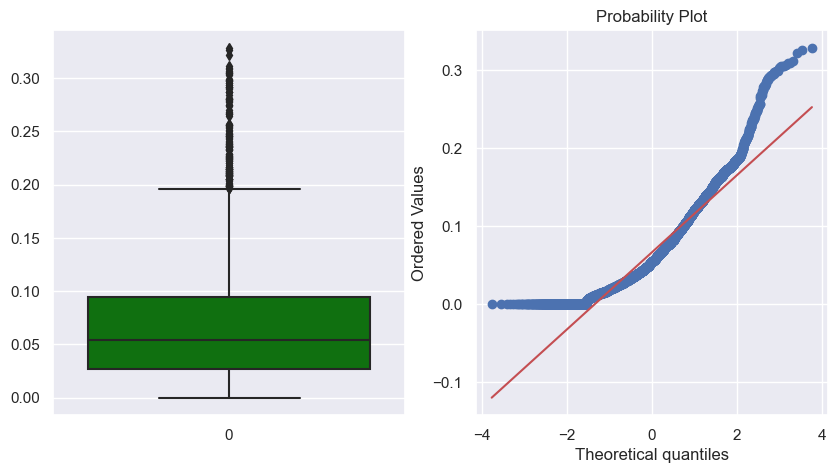

In [31]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(Bigmart['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(Bigmart['Item_Visibility'],plot=ax2)

As we can see, values above 0.2 visibility are outliers. Presence of outliers don't bode well with machine learning algos. Hence, we need to remove the outliers and try to form a normal distribution.

The probplot also seems to suggest that the values are deviating from the normal values after 0.2

Let us check the number entries with item visibility above 0.2 as outliers.

In [32]:
Bigmart[Bigmart['Item_Visibility']>0.2].shape[0]

134

Hence, out of the approximately 8300 entries, we have only 134 entries which are outliers. It would serve us well to simply remove these entries.

((array([-3.7669643 , -3.53935697, -3.41428343, ...,  3.41428343,
          3.53935697,  3.7669643 ]),
  array([0.        , 0.        , 0.        , ..., 0.19899855, 0.19993588,
         0.19995527])),
 (0.044876265916263945, 0.06322235269591131, 0.9681235088881063))

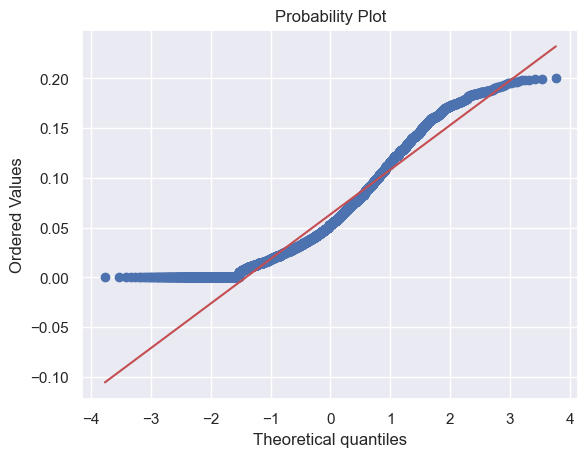

In [33]:
Bigmart= Bigmart[Bigmart['Item_Visibility']<0.2]
stats.probplot(Bigmart['Item_Visibility'],plot=plt)

Now, we see that the values above 0 are following a normal distribution to some extent. Let us check the deviation once more.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


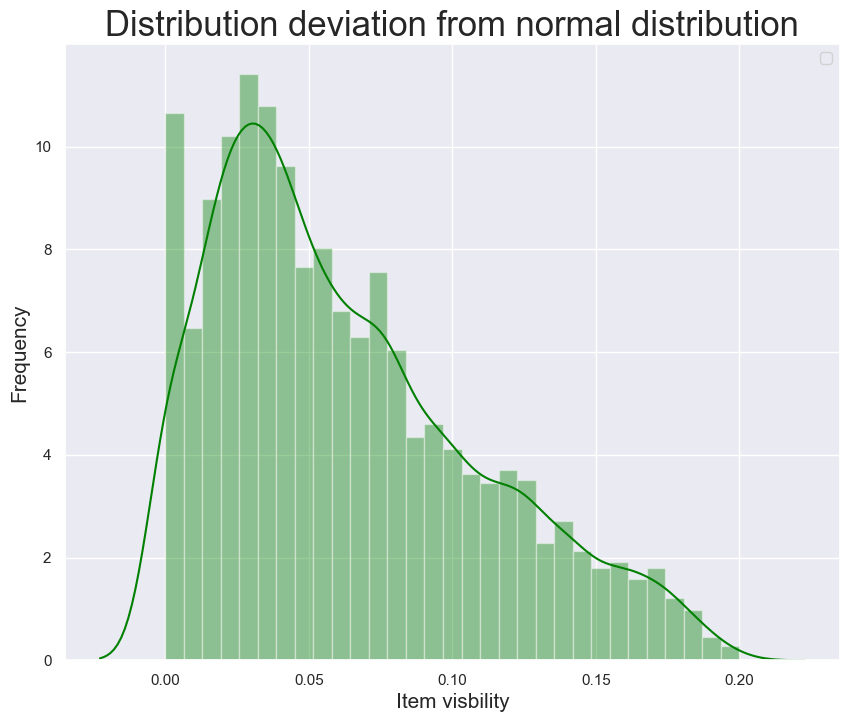

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(Bigmart['Item_Visibility'] ,color='green')
plt.title('Distribution deviation from normal distribution',size=25)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
plt.legend();

#### 3-1-3: Item_MRP

MRP is the max retail prices of the products. Let us check how the values are distributed in total.

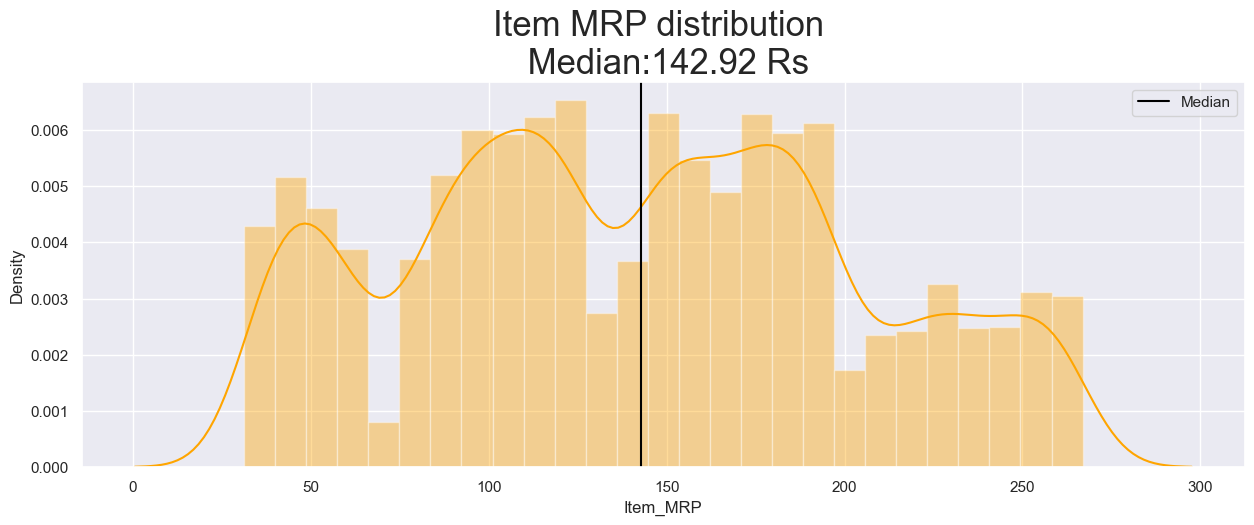

In [35]:
plt.figure(figsize=(15,5))
sns.distplot(Bigmart['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(Bigmart['Item_MRP'].median()),size=25)
plt.axvline(Bigmart['Item_MRP'].median(),color='black',label='Median')
plt.legend();

As we can see, we don't have any clear distribution of the prices here. The distribution is multi modal in nature with mulitple peaks.

The graph basically: 
* we have fair number of products whose prices range from 25-75 Rs.
* we have fair number of products in the 80-120 Rs range. Infact, it is the highest.
* the products increase again from 150-200 Rs range.
* There are fair number of products from 220-240 Rs range aswell.


Let us try to check the boxplots of how MRPs change with item products.

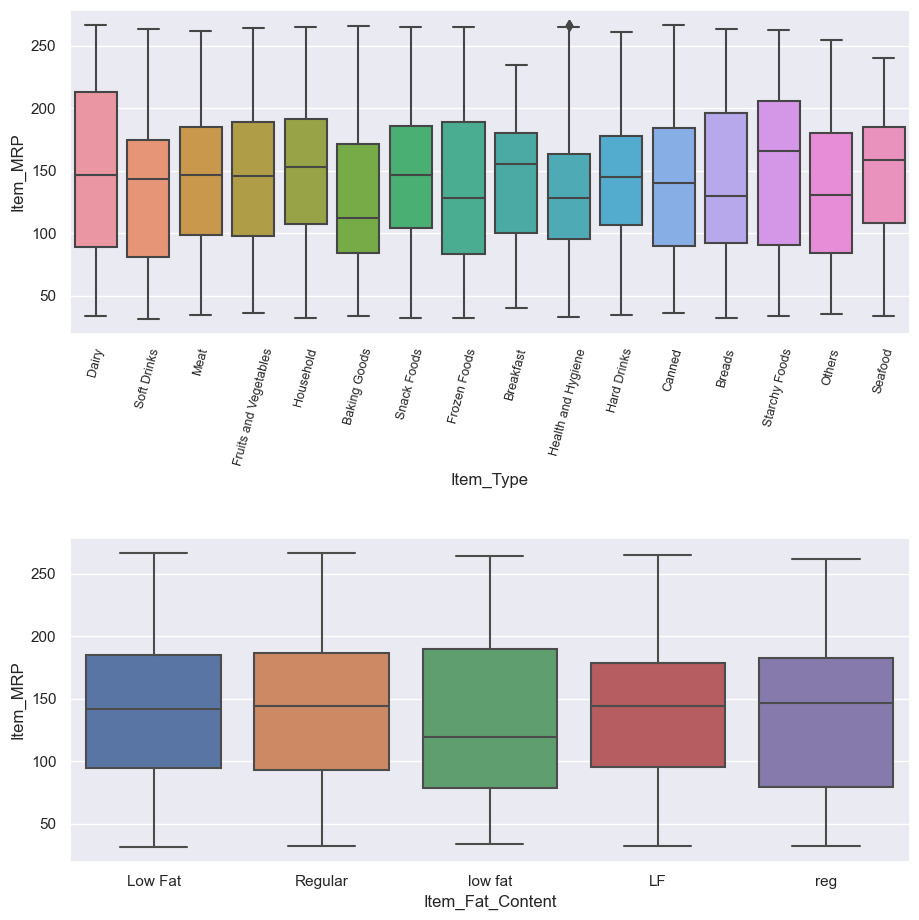

In [36]:
labels=Bigmart['Item_Type'].unique()
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=Bigmart,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data= Bigmart,ax=ax2)

fig6.tight_layout(pad=3) #For spacing between subplots

From the above plot, we see which item types have high MRPs. Dairy product and Starchy foods have a higher median price than the rest.

Both low and regular food have almost identical median price.

#### 3-1-4: Outlet_Establishment_Year

Getting the amount of established years in new column and delete old column.

In [37]:
Bigmart['Outlet_Age'] = 2023 - Bigmart['Outlet_Establishment_Year']

del Bigmart['Outlet_Establishment_Year']

Let us see if establishment year of the stores have any correlation with mean prices of items sold.

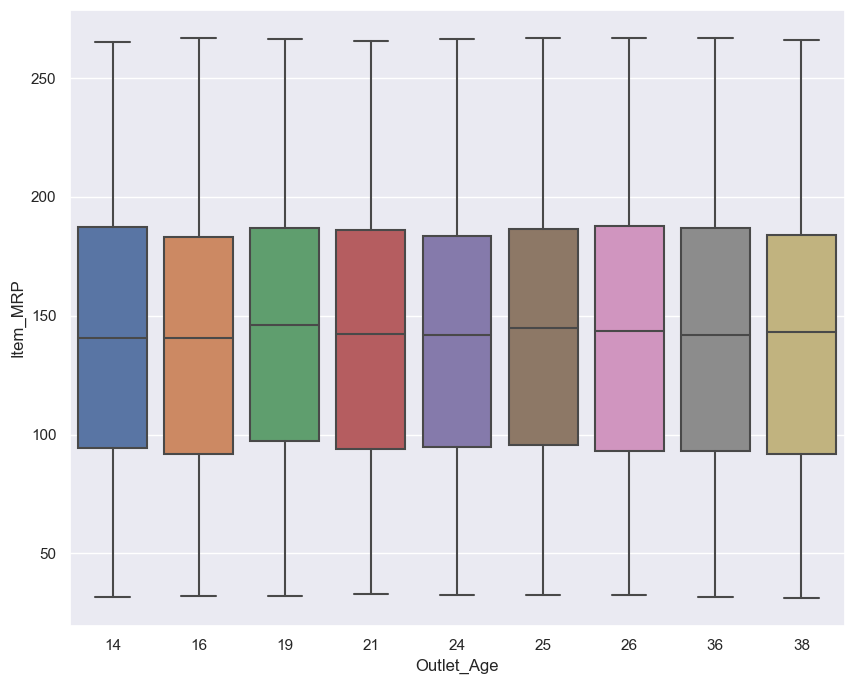

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(data= Bigmart, x= 'Outlet_Age', y= 'Item_MRP');

As we can see, no matter how old the shops are, the median prices of items sold is nearly the same. Hence, customers have no bias to buy more expensive products from older or newer markets.


Let us now check if the establishment year has anything to do with number of output sales.

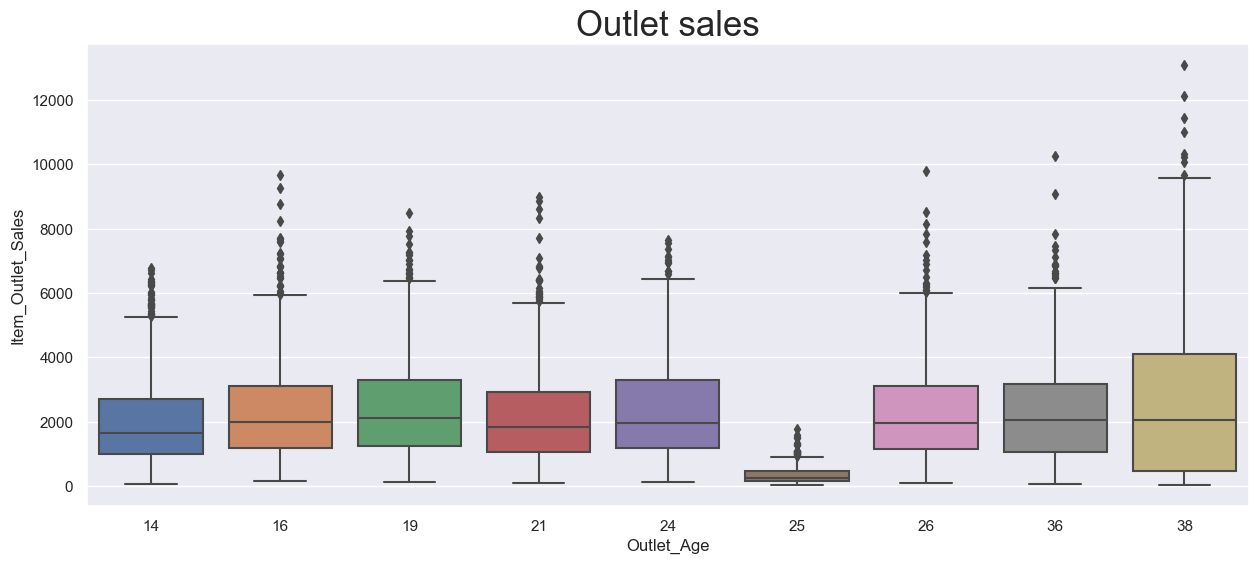

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Outlet_Age',y= 'Item_Outlet_Sales', data= Bigmart)
plt.title('Outlet sales',size=25);

As it can be seen, the sales reported by the older stores is higher than the relatively newer stores (except for the 1998 established store)

## Section 3-2: Handling Categorical Value

Becouse **'Item_Identifier'** and **'Outlet_Identifier'** has no infect on target value, we can drop them.

In [40]:
Bigmart.drop( ['Item_Identifier', 'Outlet_Identifier'], axis= 1, inplace= True)

#### Section 3-2-1: Outlet_Size

This feature deals with how big is the size of the outlet store. This field also contains empty values. Let us see if we can deal with these null values in any manner or simply discard it.

In [41]:
df_size_sales=Bigmart.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()

In [42]:
df_size_sales

Outlet_Size    Item_MRP  Item_Outlet_Sales
0        High  141.425982        2298.995256
1      Medium  140.590514        2681.603542
2       Small  141.756737        1960.412740

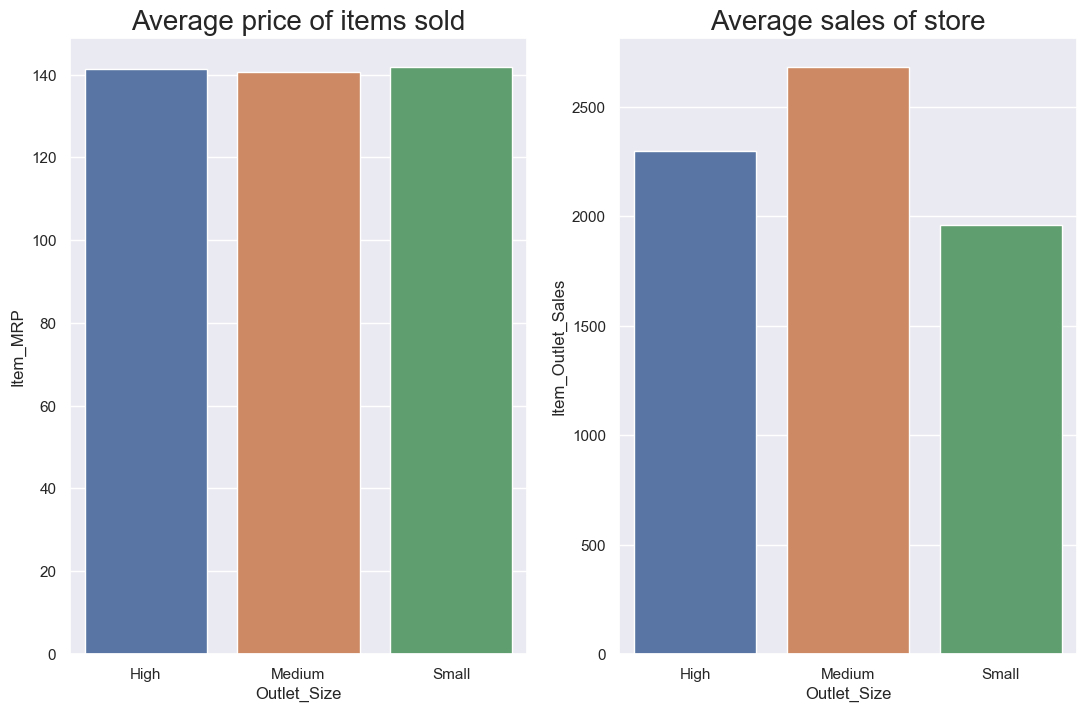

In [43]:
fig8=plt.figure(figsize=(13,8))
ax1=fig8.add_subplot(121)
sns.barplot(data= df_size_sales, y= 'Item_MRP', x= 'Outlet_Size', ax= ax1)

ax2=fig8.add_subplot(122)
sns.barplot(data= df_size_sales, y= 'Item_Outlet_Sales', x= 'Outlet_Size', ax= ax2)

ax1.set_title('Average price of items sold',size=20)
ax2.set_title('Average sales of store',size=20);

The average price of items sold in each outlet store size is nearly the same which is Rs 140. However, The medium stores seem to sell better followed by high sized and then small sized stores.<br> Here we can replace the null values with the mode because it is a categorical column.

In [44]:
Bigmart['Outlet_Size'] = Bigmart['Outlet_Size'].fillna(Bigmart['Outlet_Size'].mode()[0])

#### Section 3-2-2: Item_Fat_Content

We see there are some irregularities in the column and it is needed to fix them!<br>
for example there is low fat one with upper case and other with lower case and another abbreviated (LF) <br>
also Regular and reg. so we have 2 types of item fat content Low fat and regular

In [45]:
Bigmart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

#Bigmart['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

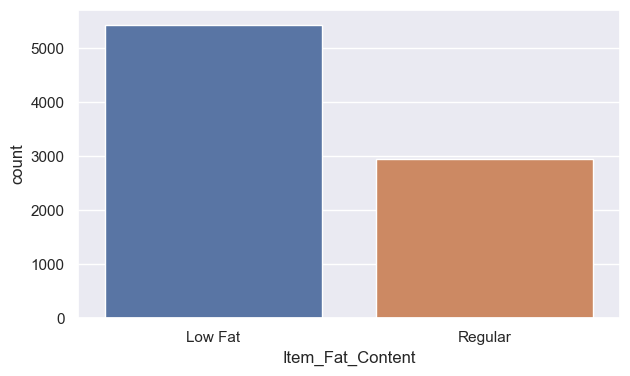

In [46]:
plt.figure(figsize= (7, 4))
sns.countplot(x= Bigmart['Item_Fat_Content'])
plt.show();

#### Section 3-2-3: Outlet_Location_Type and Outlet_Type

Let us try to analyse if the outlet location type and outlet_type has any correlation with MRP of items sold and outlet sales.

In [47]:
import plotly.express as px

In [48]:
fig9=px.sunburst(Bigmart ,path=['Outlet_Type', 'Outlet_Location_Type'], color_continuous_scale= 'RdBu')
fig9.update_layout(title='Store type with location type',title_x=0.5)
fig9.show()

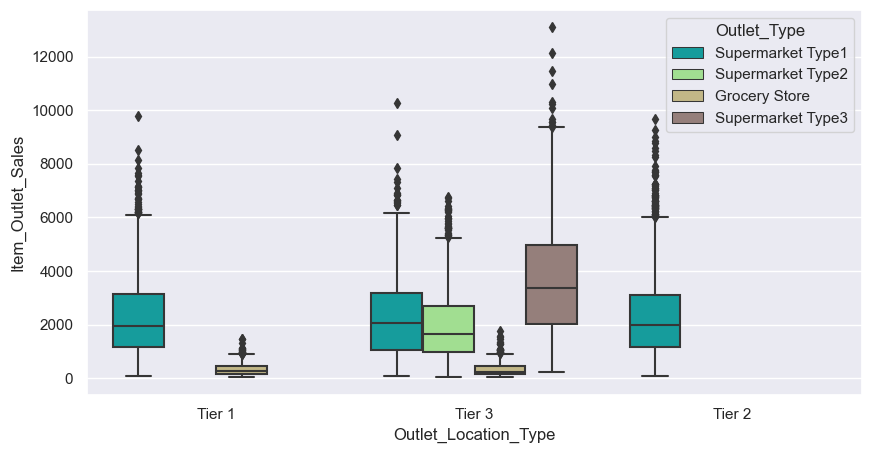

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data= Bigmart, x= 'Outlet_Location_Type', y= 'Item_Outlet_Sales', hue= 'Outlet_Type', palette= 'terrain');

As we can see, tier 3 locations seem to be selling better than both tier 2 and tier 1. It is also to be noted that tier 3 has more number of stores in it. Hence, the sales are better too.

#### Section 3-2-4: Correlation heatmap

Now that we have inspected each of the features individually, we will try to check the correlations of each term with the other.

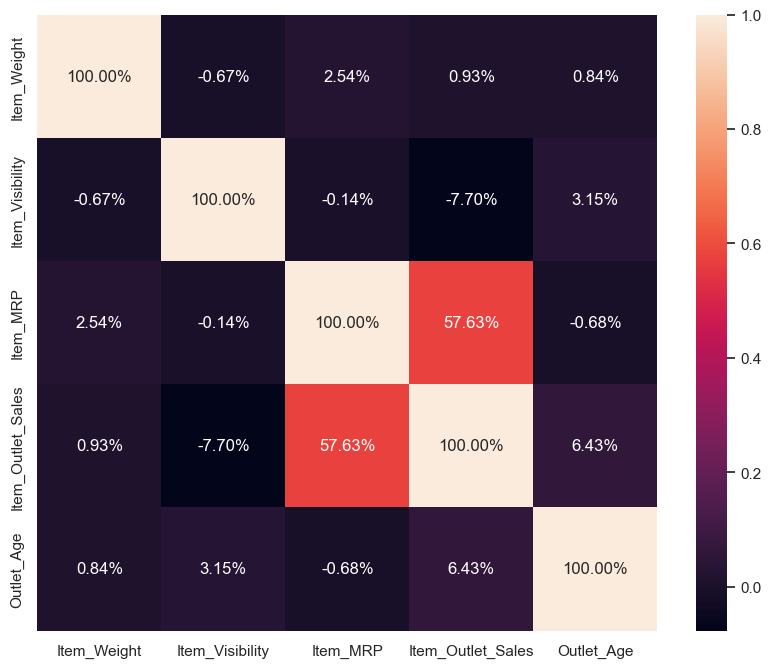

In [50]:
corrs= Bigmart.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs,annot=True,fmt='.2%');

From the above, we can see that correlation of Item_Weight is extremely low. Hence, we can simply drop this column and get done with the issues of null values. We shall similarly remove the order_size as there is no way to deal with the null values here aswell.

In [51]:
Bigmart.drop('Item_Weight', axis= 1, inplace= True)

# Section 4: Data Wrangling

Let us wrangle the data so that we can help make the dataframe into something that the ML algo can understand.

The main issue with the data given to us is the presence of categorical data. Let us handle these categorical data by using either label or one-hot encoding.


#### We have 5 categorial columns
#### Ordinal Data:(Can be ordered)
*     Outlet_Type
*     Item_Fat_Content
*     Outlet_Size
*     Outlet_Location_Type 

#### Nominal Data:(No Order)
*     Item_Type

In [52]:
for feature in Bigmart.select_dtypes(['object']).columns:
    print(feature, Bigmart[feature].unique())

Item_Fat_Content ['Low Fat' 'Regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size ['Medium' 'High' 'Small']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [53]:
# Use a dictionary to map column names to their corresponding encoders
encoders = {
    'Item_Fat_Content': LabelEncoder(),
    'Outlet_Size': LabelEncoder(),
    'Outlet_Location_Type': LabelEncoder(),
    'Outlet_Type': LabelEncoder()
}

# Apply the encoders to the train dataset
for col, encoder in encoders.items():
    Bigmart[col] = encoder.fit_transform(Bigmart[col])

In [54]:
Bigmart

Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0                    0         0.016047                  Dairy  249.8092   
1                    1         0.019278            Soft Drinks   48.2692   
2                    0         0.016760                   Meat  141.6180   
3                    1         0.000000  Fruits and Vegetables  182.0950   
4                    0         0.000000              Household   53.8614   
...                ...              ...                    ...       ...   
8518                 0         0.056783            Snack Foods  214.5218   
8519                 1         0.046982           Baking Goods  108.1570   
8520                 0         0.035186     Health and Hygiene   85.1224   
8521                 1         0.145221            Snack Foods  103.1332   
8522                 0         0.044878            Soft Drinks   75.4670   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0               1                     0            1          3735.1380   
1               1                     2            2           443.4228   
2               1                     0            1          2097.2700   
3               1                     2            0           732.3800   
4               0                     2            1           994.7052   
...           ...                   ...          ...                ...   
8518            0                     2            1          2778.3834   
8519            1                     1            1           549.2850   
8520            2                     1            1          1193.1136   
8521            1                     2            2          1845.5976   
8522            2                     0            1           765.6700   

      Outlet_Age  
0             24  
1             14  
2             24  
3             25  
4             36  
...          ...  
8518          36  
8519          21  
8520          19  
8521          14  
8522          26  

[8389 rows x 9 columns]

In [55]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(Bigmart[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = Bigmart.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
Bigmart = pd.concat([Bigmart, data_oh], axis=1)
Bigmart.head()

Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0                 0         0.016047                  Dairy  249.8092   
1                 1         0.019278            Soft Drinks   48.2692   
2                 0         0.016760                   Meat  141.6180   
3                 1         0.000000  Fruits and Vegetables  182.0950   
4                 0         0.000000              Household   53.8614   

   Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0            1                     0            1          3735.1380   
1            1                     2            2           443.4228   
2            1                     0            1          2097.2700   
3            1                     2            0           732.3800   
4            0                     2            1           994.7052   

   Outlet_Age  Item_Type_Baking Goods  ...  Item_Type_Fruits and Vegetables  \
0          24                       0  ...                                0   
1          14                       0  ...                                0   
2          24                       0  ...                                0   
3          25                       0  ...                                1   
4          36                       0  ...                                0   

   Item_Type_Hard Drinks  Item_Type_Health and Hygiene  Item_Type_Household  \
0                      0                             0                    0   
1                      0                             0                    0   
2                      0                             0                    0   
3                      0                             0                    0   
4                      0                             0                    1   

   Item_Type_Meat  Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0               0                 0                  0                      0   
1               0                 0                  0                      0   
2               1                 0                  0                      0   
3               0                 0                  0                      0   
4               0                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                      0                        0  
1                      1                        0  
2                      0                        0  
3                      0                        0  
4                      0                        0  

[5 rows x 25 columns]

In [56]:
Bigmart.drop('Item_Type', axis= 1, inplace= True)

In [57]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8389 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content                 8389 non-null   int32  
 1   Item_Visibility                  8389 non-null   float64
 2   Item_MRP                         8389 non-null   float64
 3   Outlet_Size                      8389 non-null   int32  
 4   Outlet_Location_Type             8389 non-null   int32  
 5   Outlet_Type                      8389 non-null   int32  
 6   Item_Outlet_Sales                8389 non-null   float64
 7   Outlet_Age                       8389 non-null   int64  
 8   Item_Type_Baking Goods           8389 non-null   int64  
 9   Item_Type_Breads                 8389 non-null   int64  
 10  Item_Type_Breakfast              8389 non-null   int64  
 11  Item_Type_Canned                 8389 non-null   int64  
 12  Item_Type_Dairy     

#### Section 4-1: Finding Outliers

Here we want find outliers. Pay attention that outlier just belong to numerical data.

In [58]:
Bigmart

Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0                    0         0.016047  249.8092            1   
1                    1         0.019278   48.2692            1   
2                    0         0.016760  141.6180            1   
3                    1         0.000000  182.0950            1   
4                    0         0.000000   53.8614            0   
...                ...              ...       ...          ...   
8518                 0         0.056783  214.5218            0   
8519                 1         0.046982  108.1570            1   
8520                 0         0.035186   85.1224            2   
8521                 1         0.145221  103.1332            1   
8522                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Outlet_Age  \
0                        0            1          3735.1380          24   
1                        2            2           443.4228          14   
2                        0            1          2097.2700          24   
3                        2            0           732.3800          25   
4                        2            1           994.7052          36   
...                    ...          ...                ...         ...   
8518                     2            1          2778.3834          36   
8519                     1            1           549.2850          21   
8520                     1            1          1193.1136          19   
8521                     2            2          1845.5976          14   
8522                     0            1           765.6700          26   

      Item_Type_Baking Goods  Item_Type_Breads  ...  \
0                          0                 0  ...   
1                          0                 0  ...   
2                          0                 0  ...   
3                          0                 0  ...   
4                          0                 0  ...   
...                      ...               ...  ...   
8518                       0                 0  ...   
8519                       1                 0  ...   
8520                       0                 0  ...   
8521                       0                 0  ...   
8522                       0                 0  ...   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   1                      0   
4                                   0                      0   
...                               ...                    ...   
8518                                0                      0   
8519                                0                      0   
8520                                0                      0   
8521                                0                      0   
8522                                0                      0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                                0                    0               0   
1                                0                    0               0   
2                                0                    0               1   
3                                0                    0               0   
4                                0                    1               0   
...                            ...                  ...             ...   
8518                             0                    0               0   
8519                             0                    0               0   
8520                             1                    0               0   
8521                             0                    0               0   
8522                             0                    0              

In [59]:
# finding outliers
def detect_outliers (data, column):
    for col in column:
        mean_ = data[col].mean()
        Sdev_= data[col].std()
        Upper_limit= mean_+ (3*Sdev_)
        lower_limit= mean_- (3*Sdev_) #error 
        out= data[(data[col]>Upper_limit)|(data[col]<lower_limit)].index
    
        data.drop(out ,inplace=True)
    
    return data

In [60]:
num_col= ['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 
         'Outlet_Type', 'Item_Outlet_Sales']
Bigmart= detect_outliers(Bigmart, num_col)

#### Section 4-2: Feature Scaling

Let’s scale and center the numeric variables to make them have a mean of zero, standard deviation of one and
scale of 0 to 1. Scaling and centering is required for linear regression models.

In [61]:
Bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8300 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content                 8300 non-null   int32  
 1   Item_Visibility                  8300 non-null   float64
 2   Item_MRP                         8300 non-null   float64
 3   Outlet_Size                      8300 non-null   int32  
 4   Outlet_Location_Type             8300 non-null   int32  
 5   Outlet_Type                      8300 non-null   int32  
 6   Item_Outlet_Sales                8300 non-null   float64
 7   Outlet_Age                       8300 non-null   int64  
 8   Item_Type_Baking Goods           8300 non-null   int64  
 9   Item_Type_Breads                 8300 non-null   int64  
 10  Item_Type_Breakfast              8300 non-null   int64  
 11  Item_Type_Canned                 8300 non-null   int64  
 12  Item_Type_Dairy     

In [62]:
dependent = Bigmart['Item_Outlet_Sales']
feature = Bigmart.drop(columns=['Item_Outlet_Sales'])
X_train, X_test, y_train, y_test = train_test_split(feature, dependent, test_size=0.25, random_state=0)
print('The X_train shape is:{} and the X_test shape is:{} while the y_train shape is:{} and the y_test shape is:{}'.format
     (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

The X_train shape is:(6225, 23) and the X_test shape is:(2075, 23) while the y_train shape is:(6225,) and the y_test shape is:(2075,)


In [63]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#### Section 4-3:  Removing skewness from visibility column

We have skewed numerical data in *Item_Outlet_Sales* column. So we make them Gaussian distribution.

In [64]:
Bigmart['Item_Outlet_Sales']=np.sqrt(Bigmart['Item_Outlet_Sales'])

In [65]:
Bigmart['Item_Outlet_Sales'].skew()

0.11057180374716005

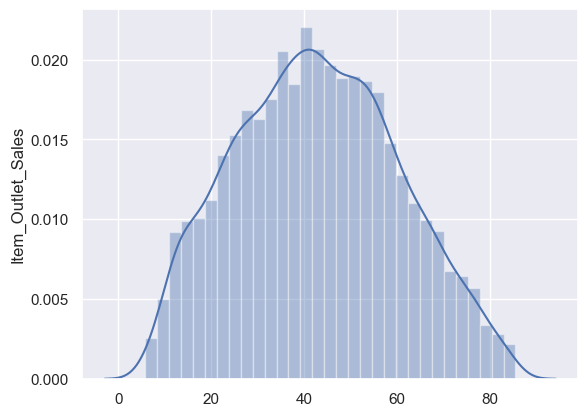

In [66]:
sns.distplot(x=Bigmart['Item_Outlet_Sales'])
plt.ylabel('Item_Outlet_Sales')
plt.show();

# Section 5: Model Building

Before feeding our data into any model, it is a good practice to preprocess the data. We will do preprocessing on
both independent variables and target variable.

**Checking Skewness:**

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally
distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to
make the distribution of the skewed variable as close to normal distribution as possible.

Everything is now okay we are prepare to test and compare different classification Model.

In [67]:
# Takes in a classifier, trains the classifier, and evaluates the classifier on the dataset
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(X_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction= classifier.predict(X_test)
    evaluate_prediction= cross_val(X_train,y_train, classifier)
    
    
    return evaluate_prediction

def cross_val(X_train, y_train, classifier):
    # Applying k-Fold Cross Validation
    
    accuracies = cross_val_score(estimator= classifier, X= X_train, y= y_train, cv= 10)
    return accuracies.mean()


In [68]:
lr= LinearRegression()
lr_acc= do_prediction(lr)

In [69]:
xgb = XGBRegressor(colsample_bytree= 0.7, gamma= 0.1, learning_rate=0.05, max_depth=5, min_child_weight= 3)
xgb_acc= do_prediction(xgb)

In [70]:
rfr= RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=3)
rfr_acc= do_prediction(rfr)

In [71]:
dtree_reg = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth=25)
dtree_reg_acc= do_prediction(dtree_reg)

In [72]:
gbr = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=200, subsample=1)
gbr_acc= do_prediction(gbr)

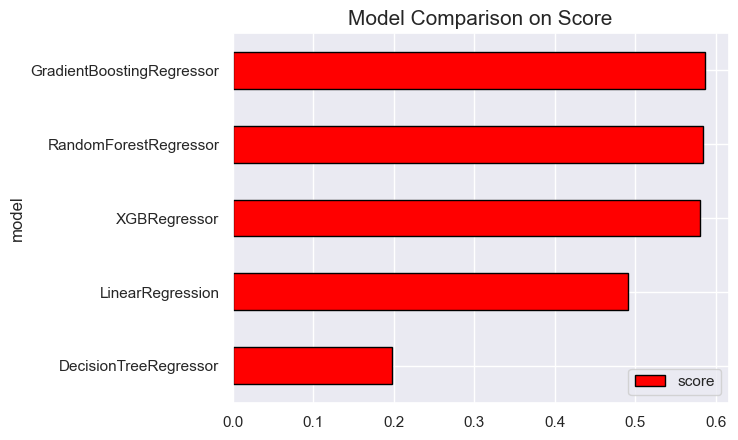

In [73]:
weight= pd.DataFrame({
    'model': ['LinearRegression', 'XGBRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor', 
              'GradientBoostingRegressor'],
    'score': [lr_acc, xgb_acc, rfr_acc, dtree_reg_acc, gbr_acc]
})

weight.sort_values('score', ascending= True).plot(x= 'model', y= 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
plt.title('Model Comparison on Score', size = 15);

In [74]:
print(weight.sort_values(by= 'score', ascending= False))

                       model     score
4  GradientBoostingRegressor  0.586748
2      RandomForestRegressor  0.584108
1               XGBRegressor  0.580188
0           LinearRegression  0.491273
3      DecisionTreeRegressor  0.197596


In [75]:
#train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])
# Define constants for bin edges and labels 
VIS_BINS = [0.0, 0.065, 0.13, 0.2]
VIS_LABELS = ['Low Viz', 'Medium Viz', 'High Viz']

# Create visibility binning util function
def bin_visibility(df, visibility_col, bins, labels):
    return pd.cut(df[visibility_col], bins=bins, labels=labels)

# Bin visibility in production code
Bigmart['visibility_bins'] = bin_visibility(
  df=Bigmart,
  visibility_col='Item_Visibility',
  bins=VIS_BINS,
  labels=VIS_LABELS
)

This line of code is binning the 'Item_Visibility' column in the 'train' dataframe into 3 bins based on the visibility value:

It uses pd.cut() to bin the 'Item_Visibility' column into 3 bins:
- [0.000, 0.065] -> 'Low Viz'
- (0.065, 0.13] -> 'Viz'
- (0.13, 0.2] -> 'High Viz'

So it is creating a new column 'Item_Visibility_bins' in the 'train' dataframe that categorizes the visibility as Low, Medium or High based on the value in 'Item_Visibility'.